In [ ]:
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.layers import Input, BatchNormalization, ReLU, \
     Conv2D, Dense, MaxPool2D, AvgPool2D, GlobalAvgPool2D, Concatenate,Dropout
from tensorflow.keras import Model
import cv2
import keras as K
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import random
from PIL import Image
import  cv2
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from numpy import trapz
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.applications.resnet import ResNet101

from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

from sklearn.metrics import precision_score, recall_score, f1_score
import keras
from keras.layers import Input,Conv2D,Activation,Dense,Lambda,Flatten,Embedding,PReLU,BatchNormalization,Dropout
from keras.models import Model
import keras.backend as K
from keras.utils import to_categorical
import numpy as np
from keras.callbacks import EarlyStopping

from keras.applications.densenet import DenseNet201

from tensorflow.keras import layers, losses, optimizers, metrics
from tensorflow.keras.applications import DenseNet121
from keras.applications.densenet import preprocess_input
from keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight

import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h3>Functions</h3>

In [ ]:
def plot_confusion_matrix(model, X, y_true):
    y_pred = model.predict(X)[1]
    y_pred= np.argmax(y_pred, axis=1)
    y_tt=   np.argmax(y_true, axis=1)

    unique_labels = np.unique(y_true)
    num_classes = len(unique_labels)

    cm = confusion_matrix(y_tt, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, unique_labels, rotation=45)
    plt.yticks(tick_marks, unique_labels)
    plt.tight_layout()
    plt.show()

In [ ]:
def avgmd(model, X, y_true,num_classes,index):
  y_pred=model.predict(X)[1]
  # if index==0:
  #   y_pred=model.predict(X)
  # else:
  #   y_pred=model.predict(X)[1]
  y_pred=np.argmax(y_pred,axis=1)
  y_tt=   np.argmax(y_true, axis=1)
  cm = confusion_matrix(y_tt, y_pred)
  cmsum=np.sum(cm,axis=1)
  cmdivide=cm/cmsum
  md_avg = np.trace(cmdivide)
  return md_avg/num_classes


In [ ]:
from sklearn.metrics import classification_report
def classification__report(model, X, y_true,index):
  if index==0:
    y_pred=model.predict(X)
  else:
    y_pred=model.predict(X)[1]
  y_pred=np.argmax(y_pred,axis=1)
  y_tt=   np.argmax(y_true, axis=1)
  target_names = ['class 0', 'class 1', 'class 2','class 3']
  print(classification_report(y_tt, y_pred, target_names=target_names))


In [ ]:
# open pickle file
with open('/content/drive/MyDrive/figs_class4.pickle', 'rb') as handle:
    x_train, y_train, x_test, y_test,x1,x2,x3,x4 = pickle.load(handle)

In [ ]:
unique_elements, counts = np.unique(y_train, return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"Element: {element}, Precision: {(count/len(y_train))*100}")

Element: 0, Precision: 52.924217462932454
Element: 1, Precision: 5.848434925864909
Element: 2, Precision: 22.99560680944536
Element: 3, Precision: 18.231740801757276


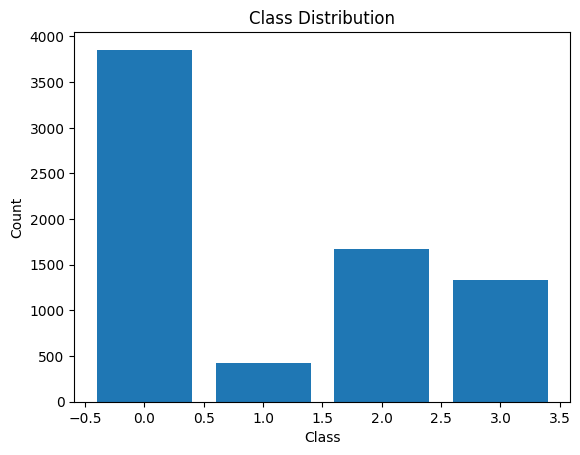

In [ ]:

plt.bar(unique_elements, counts)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

plt.show()

In [ ]:
indices=[]
for element in unique_elements:
    in1 = np.where(y_train== element)[0][:5]
    indices.append(in1)
    print(f"Element: {element}, Indices: {in1}")
print(indices)

Element: 0, Indices: [0 1 2 3 4]
Element: 1, Indices: [110 111 112 113 114]
Element: 2, Indices: [196 197 198 199 200]
Element: 3, Indices: [377 378 379 380 381]
[array([0, 1, 2, 3, 4]), array([110, 111, 112, 113, 114]), array([196, 197, 198, 199, 200]), array([377, 378, 379, 380, 381])]


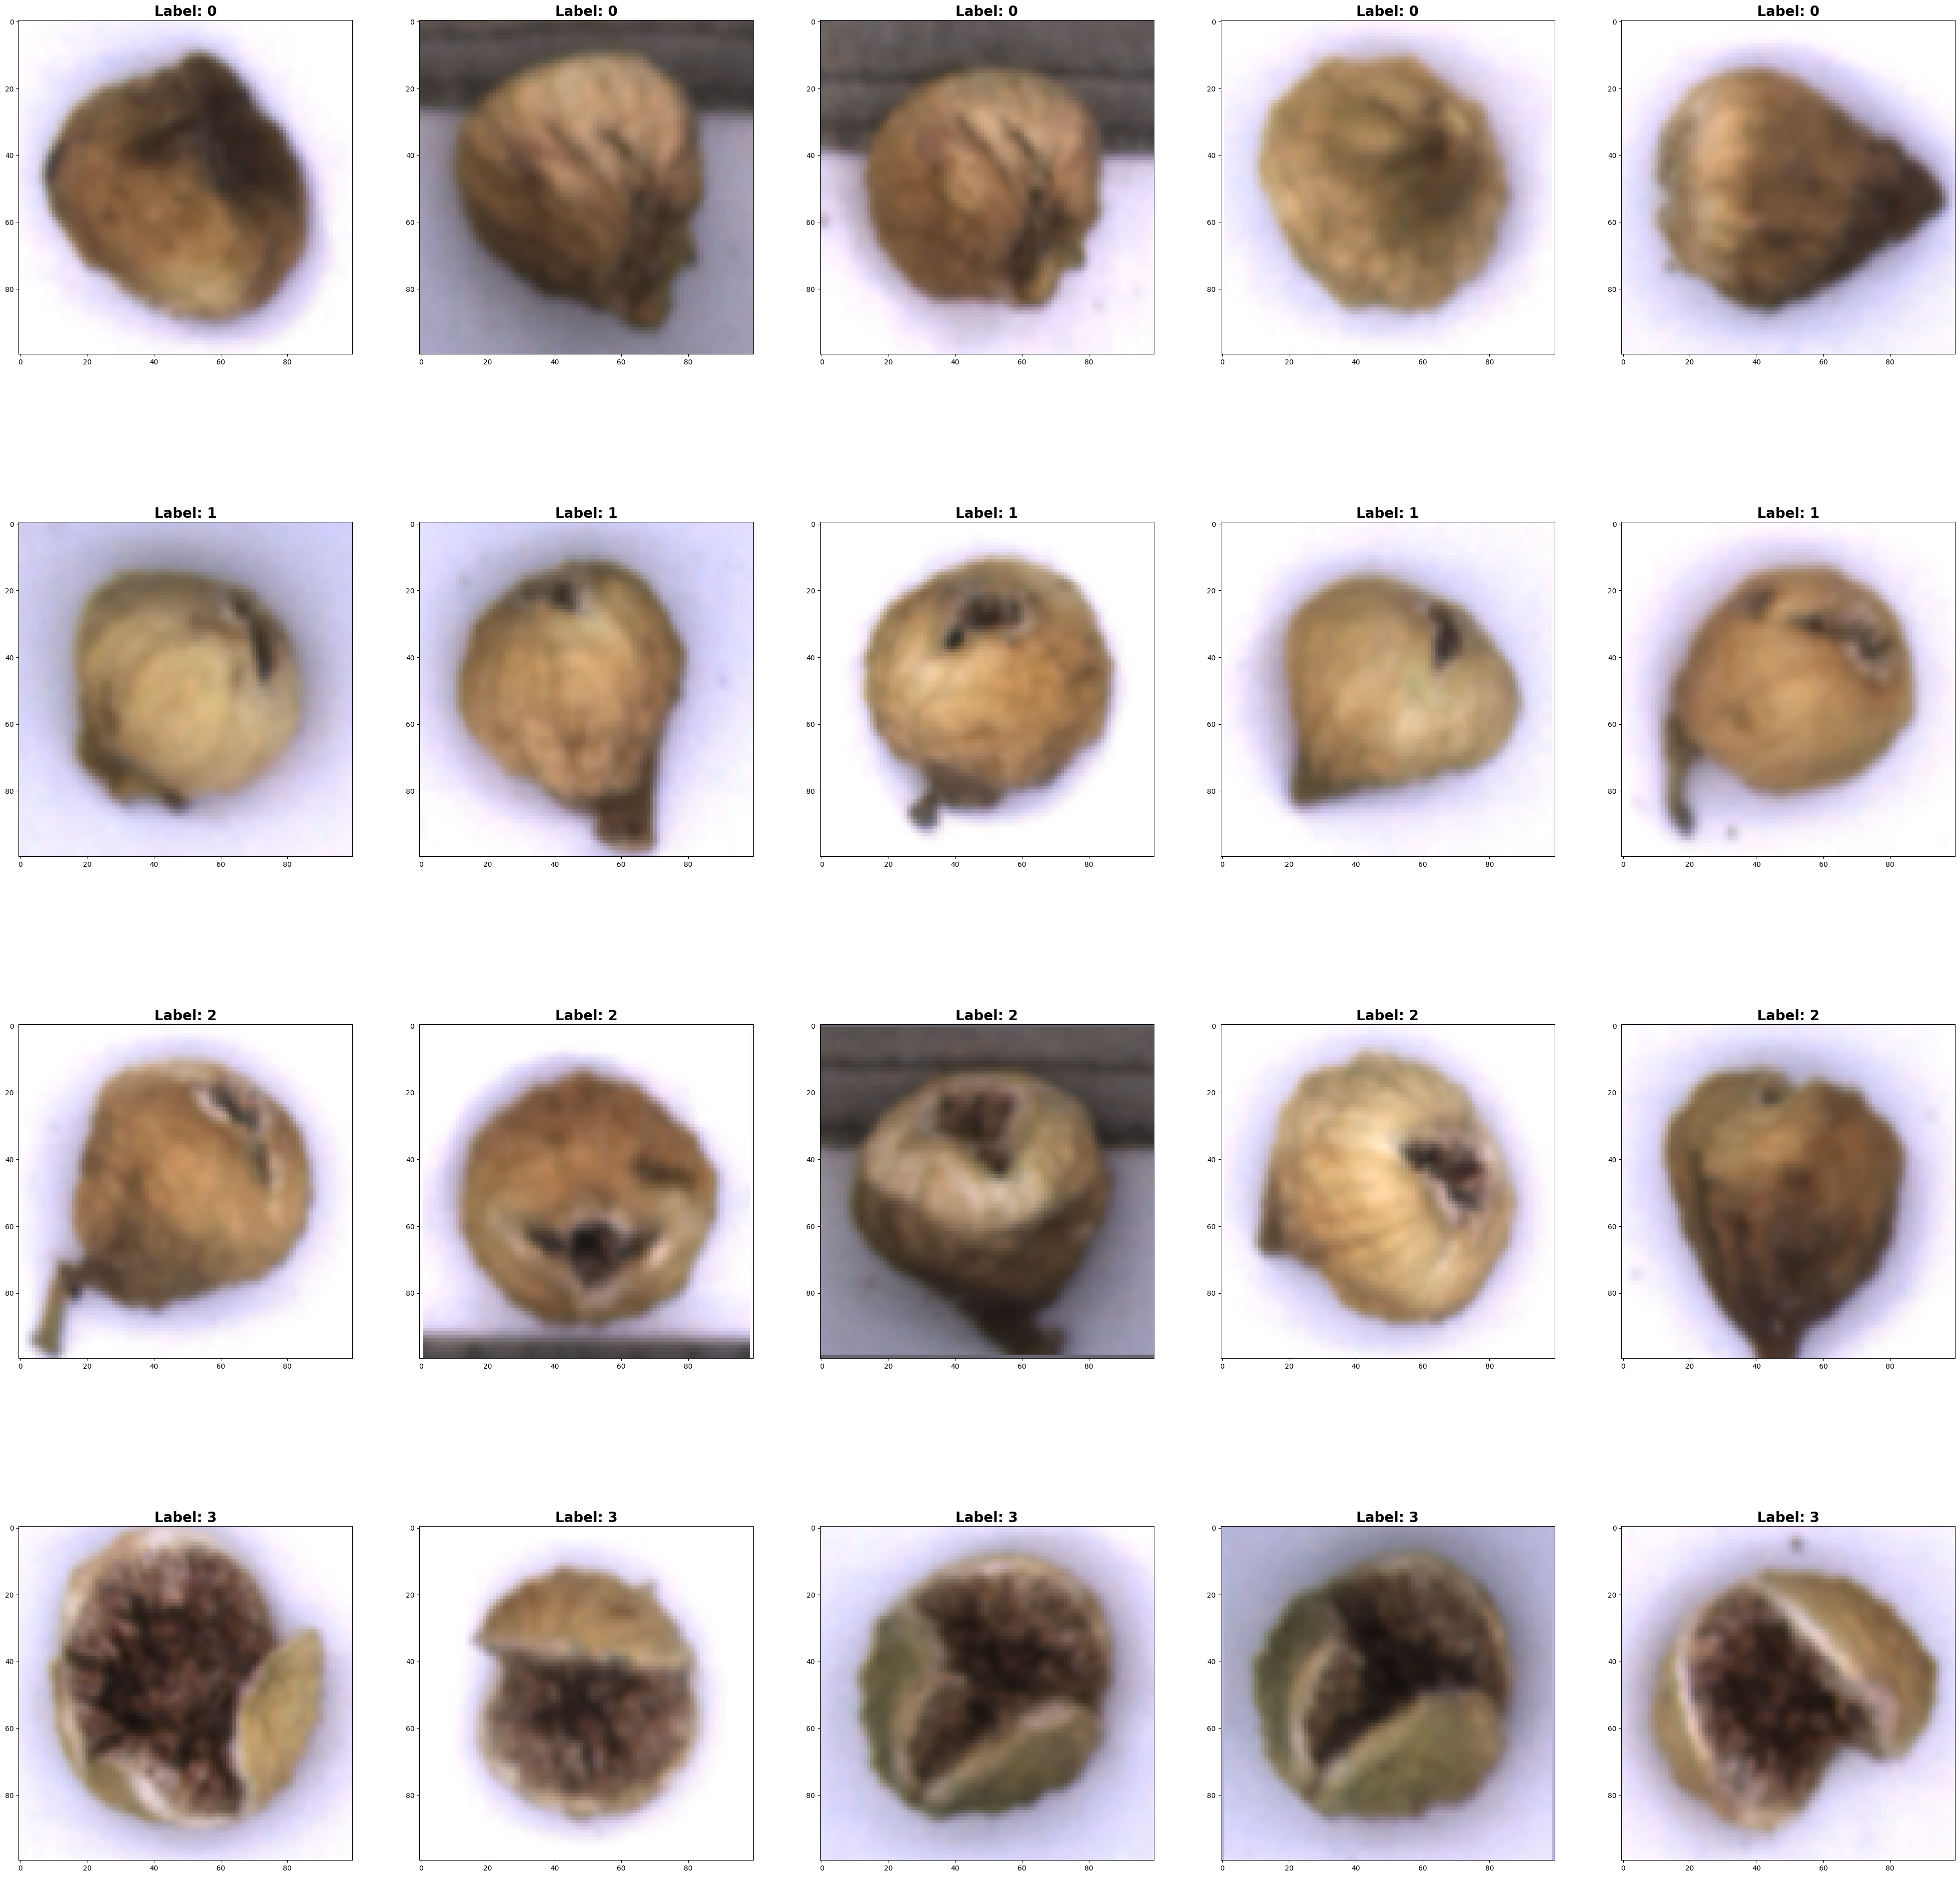

In [ ]:
m,n=len(indices),len(indices[0])
fig, axes = plt.subplots(m, n,figsize=(50, 50))
imsamples=x_train[indices]
for i in range(m):
  for j in range(n):
    axes[i,j].imshow(imsamples[i][j][:,:,::-1])
    axes[i, j].set_title("Label: {}".format(i), fontsize=20, fontweight="bold")
plt.show()

# imsamples=x_train[indices]
# m=imsamples[3][0].copy()
# rgb_image = cv2.cvtColor(m, cv2.COLOR_BGR2RGB)
# print(m[::-1].shape)
# plt.imshow(m[:,:,::-1])

<h2>Imbalance Dataset</h2>

In [ ]:
def shufflerandom(x_,y_):
  indices = np.arange(len(y_))
  np.random.shuffle(indices)
  x_ = x_[indices]
  y_ = y_[indices]
  return x_, y_

x_train,y_train=shufflerandom(x_train,y_train)
print(y_train[0:600])

[2 1 0 1 3 3 0 2 0 0 0 0 2 3 2 0 3 0 0 0 3 0 0 0 0 0 0 3 0 3 0 2 0 0 1 2 0
 0 2 0 0 0 0 0 2 2 0 0 0 3 2 0 0 0 0 2 2 0 1 0 0 2 0 0 2 0 2 2 0 3 0 2 0 3
 3 0 0 2 0 0 1 3 0 0 1 0 0 0 2 0 2 2 2 3 0 1 1 3 2 2 2 0 0 0 3 2 0 2 3 0 0
 2 2 0 0 0 3 1 0 0 0 0 2 0 1 0 3 3 0 0 2 0 2 2 2 3 2 2 1 2 0 0 0 1 0 0 0 0
 0 2 0 1 0 2 0 0 2 3 2 2 0 0 2 0 1 0 0 2 0 2 2 2 0 0 1 2 3 3 0 2 0 0 3 0 0
 2 0 0 0 2 1 2 0 0 2 2 3 2 3 3 2 3 2 0 0 2 0 0 3 0 0 0 2 2 0 0 3 0 0 3 2 2
 0 0 0 3 2 0 0 0 3 3 0 0 3 0 0 0 0 0 2 3 2 1 2 2 3 0 0 3 2 3 0 0 0 0 0 2 0
 0 3 3 2 2 0 0 3 0 2 2 3 0 3 0 3 3 0 0 0 2 0 2 1 0 0 0 0 0 0 1 0 0 0 2 2 3
 0 2 0 0 2 3 2 0 2 0 2 0 2 0 0 3 0 2 0 0 0 3 2 0 2 2 1 0 3 2 0 2 0 0 2 2 0
 0 0 2 3 2 0 2 2 0 2 2 2 0 2 0 1 2 2 0 0 0 3 1 2 0 2 2 0 1 2 2 3 0 2 2 0 0
 0 2 3 0 2 0 1 0 0 3 3 3 3 2 0 0 0 3 3 0 3 3 0 0 3 0 3 1 0 2 0 0 0 0 0 0 2
 3 3 2 0 0 0 3 1 2 1 1 2 3 0 0 0 0 0 0 3 0 2 3 0 0 0 1 2 0 2 3 0 3 0 0 2 2
 0 2 0 2 0 2 0 0 3 0 0 0 2 3 1 0 3 0 0 2 0 3 2 0 2 0 3 0 2 0 0 3 0 2 1 0 0
 3 0 2 3 0 0 0 0 0 0 0 0 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [ ]:

def preprocess_data(X, Y, num_classes):
    """
    Pre-processes the data.

    Args:
        X (array): Input data.
        Y (array): Target labels.
        num_classes (int): Number of classes.

    Returns:
        tuple: Pre-processed input dataand one-hot encoded target labels.
    """
    # Scale input data
    X_p = X.astype(np.float32)
    X_p /= 255.0

    # One-hot encode target labels
    Y_p = to_categorical(Y, num_classes)

    return X_p, Y_p

In [ ]:
num_classes=4
X_train,Y_train=preprocess_data(X_train,Y_train,num_classes)
X_val,Y_val =preprocess_data(X_val, Y_val,num_classes)

In [ ]:
shapeimg=100
OldModel = DenseNet121(include_top=False,weights='imagenet',input_shape=(100, 100, 3))
OldModel.trainable=False



# Add Global Average Pooling layer
x = OldModel.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(256, activation='relu')(x)

# Add the final classification layer
predictions = Dense(num_classes, activation='softmax')(x)
print(predictions.shape)

29084464/29084464 [==============================] - 0s 0us/step
(None, 4)


In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model = Model(inputs=OldModel.input, outputs=predictions)
model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy',
              metrics=['acc',f1_m,precision_m, recall_m])

In [ ]:
print(X_train.shape,Y_train.shape,X_val.shape, Y_val.shape)

(5827, 100, 100, 3) (5827, 4) (1457, 100, 100, 3) (1457, 4)


<h3>Data Augment</h3>

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

augmented_generator = datagen.flow(
    x=X_train,
    y=Y_train,
    batch_size=32
)

In [ ]:
# Assuming you have the integer labels for your dataset
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
print(class_weights )

{0: 0.4723735408560311, 1: 4.274647887323944, 2: 1.0871641791044777, 3: 1.3712349397590362}


In [ ]:
history_withoutsearch=model.fit(augmented_generator,validation_data=(X_val, Y_val), epochs=10, batch_size=32 )

Epoch 1/10
183/183 [==============================] - 32s 137ms/step - loss: 0.7028 - acc: 0.7457 - f1_m: 0.7407 - precision_m: 0.7766 - recall_m: 0.7095 - val_loss: 0.5171 - val_acc: 0.8147 - val_f1_m: 0.8123 - val_precision_m: 0.8455 - val_recall_m: 0.7828
Epoch 2/10
183/183 [==============================] - 23s 127ms/step - loss: 0.5517 - acc: 0.7985 - f1_m: 0.8002 - precision_m: 0.8327 - recall_m: 0.7715 - val_loss: 0.5724 - val_acc: 0.7852 - val_f1_m: 0.7851 - val_precision_m: 0.8151 - val_recall_m: 0.7583
Epoch 3/10
183/183 [==============================] - 32s 173ms/step - loss: 0.5236 - acc: 0.8092 - f1_m: 0.8050 - precision_m: 0.8369 - recall_m: 0.7768 - val_loss: 0.4762 - val_acc: 0.8277 - val_f1_m: 0.8242 - val_precision_m: 0.8580 - val_recall_m: 0.7936
Epoch 4/10
183/183 [==============================] - 26s 141ms/step - loss: 0.4991 - acc: 0.8107 - f1_m: 0.8143 - precision_m: 0.8468 - recall_m: 0.7853 - val_loss: 0.4871 - val_acc: 0.8154 - val_f1_m: 0.8169 - val_precisi

<h3>fine tuning</h3>

In [ ]:
# Unfreeze the base model
OldModel.trainable = True
model.compile(optimizer=Adam(lr=1e-5), loss='categorical_crossentropy',
              metrics=['acc',f1_m,precision_m, recall_m])

In [ ]:
history_withoutsearch=model.fit(augmented_generator,validation_data=(X_val, Y_val), epochs=20, batch_size=32 )

Epoch 1/20
183/183 [==============================] - 124s 194ms/step - loss: 0.6349 - acc: 0.7736 - f1_m: 0.7634 - precision_m: 0.8206 - recall_m: 0.7169 - val_loss: 0.6984 - val_acc: 0.7406 - val_f1_m: 0.7291 - val_precision_m: 0.7746 - val_recall_m: 0.6899
Epoch 2/20
183/183 [==============================] - 35s 190ms/step - loss: 0.4980 - acc: 0.8133 - f1_m: 0.8106 - precision_m: 0.8512 - recall_m: 0.7750 - val_loss: 0.9187 - val_acc: 0.7213 - val_f1_m: 0.7248 - val_precision_m: 0.7580 - val_recall_m: 0.6954
Epoch 3/20
183/183 [==============================] - 29s 156ms/step - loss: 0.4553 - acc: 0.8263 - f1_m: 0.8227 - precision_m: 0.8598 - recall_m: 0.7901 - val_loss: 0.4708 - val_acc: 0.8277 - val_f1_m: 0.8313 - val_precision_m: 0.8469 - val_recall_m: 0.8168
Epoch 4/20
183/183 [==============================] - 32s 174ms/step - loss: 0.4423 - acc: 0.8351 - f1_m: 0.8319 - precision_m: 0.8685 - recall_m: 0.7992 - val_loss: 0.4475 - val_acc: 0.8291 - val_f1_m: 0.8316 - val_precis

In [ ]:
X_test,Y_test=preprocess_data(x_test,y_test,num_classes)
print(X_test.shape,Y_test.shape)
test_loss, test_accuracy,test_f1,test_precision_m,test_recall = model.evaluate(X_test,Y_test)
print(test_loss,test_accuracy)

(786, 100, 100, 3) (786, 4)
25/25 [==============================] - 21s 77ms/step - loss: 0.4514 - acc: 0.8282 - f1_m: 0.8282 - precision_m: 0.8422 - recall_m: 0.8153
0.4514242112636566 0.8282442688941956


<h3>Search hyperParametr for Augmentation</h3>

In [ ]:
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from keras.callbacks import ReduceLROnPlateau

In [ ]:
# Install Gpyopt
!pip install GPyOpt
import GPy, GPyOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for GPyOpt: filename=GPyOpt-1.2.6-py3-none-any.whl size=83588 sha256=5d5d5d7424d56538c9909d79f8fa8a364ca809d90e18052b59ad5c4e35387a9d
  Stored in directory: /root/.cache/pip/wheels/72/17/52/9d818b4c60f733bf49d5cf82bc2758ebbdc57a0471137c37be
  Created wheel for GPy: filename=GPy-1.10.0-cp310-cp310-linux_x86_64.whl size=3410092 sha256=04cc7635e0cc61e4759a9ed433bc3df26f449b090220a901fa7d39e9dfd09ec3
  Stored in directory: /root/.cache/pip/wheels/27/bd/9f/82ab4216eae088cba864ca0dc1d75699bd4bf6823790fb2f77
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102544 sha256=65ab4e25f649fe87975ccd22e06

In [ ]:
# Define your model architecture
def create_model():
    shapeimg=100
    OldModel = DenseNet121(include_top=False,weights='imagenet',input_shape=(100, 100, 3))
    OldModel.trainable=False

    # Add Global Average Pooling layer
    x = OldModel.output
    x = GlobalAveragePooling2D()(x)
    # Add a fully-connected layer
    x = Dense(256, activation='relu')(x)

    # Add the final classification layer
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=OldModel.input, outputs=predictions)
    return model

In [ ]:
# global parameter for counting iteration
image_data_generator_opt_iter = 0

# fuction for GpyOpt
def image_data_generator_opt_f(x):
    # global
    global image_data_generator_opt_iter

    image_data_generator_opt_iter += 1
    print("========== {:2d} ==========".format(image_data_generator_opt_iter))

    # parameters for fit
    bs = 32
    ep = 10

    # arguments
    rr = x[:, 0][0]  # rotation_range
    wsr = x[:, 1][0] # width_shear_range
    hsr = x[:, 2][0] # height_shear_range
    sr = x[:, 3][0]  # shear_range
    zr = x[:, 4][0]  # zoom_range
    hf = False       # horizontal_flip
    vf = False       # vertical_flip

    parameter_name = ["rotation_range", "width_shift_range", "hight_shift_range", "shear_range", "zoom_range",
                      "horizontal_flip", "vertical_flip"]
    parameter_value = [rr, wsr, hsr, sr, zr, hf, vf]

    for n, v in zip(parameter_name, parameter_value):
        print("{:<20} ; {}".format(n, v))

    # CNN model parameters
    cnn_model_parameters = {'filters':256}

    # create model and compile
    model = create_model()
    model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # ImageDataGenerator
    datagen = ImageDataGenerator(rotation_range=rr,
                                 width_shift_range=wsr,
                                 height_shift_range=hsr,
                                 shear_range=sr,
                                 zoom_range=zr,
                                 horizontal_flip=hf,
                                 vertical_flip=vf,
                                 fill_mode='nearest')

    # callback
    reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss',
                                           factor=0.47,
                                           patience=5,
                                           min_lr=0.00005,
                                           verbose=1)

    # fit
    history = model.fit(datagen.flow(X_train, Y_train, batch_size=bs),
                                  steps_per_epoch=len(X_train)/bs,
                                  validation_data=(X_val, Y_val),
                                  epochs=ep,
                                  callbacks=[reduce_lr_callback])

    # check history and minimum val_loss
    history_df = pd.DataFrame(history.history)
    val_loss_min = history_df["val_loss"].min()

    # print val_loss_min
    print("{:<20} ; {}".format("minimum val_loss", val_loss_min))
    print("")

    # return minimum val_loss
    return val_loss_min

In [ ]:
# set parameters
bounds = [{'name': 'rr',  'type': 'continuous', 'domain': (10, 50)},
          {'name': 'wsr', 'type': 'continuous', 'domain': (0.1, 0.4)},
          {'name': 'hsr', 'type': 'continuous', 'domain': (0.1, 0.4)},
          {'name': 'sr',  'type': 'continuous', 'domain': (0.1, 0.4)},
          {'name': 'zr',  'type': 'continuous', 'domain': (0.1, 0.4)}]

# initialization
myBopt = GPyOpt.methods.BayesianOptimization(f=image_data_generator_opt_f,
                                             domain=bounds,
                                             initial_design_numdata=7,
                                             acquisition_type='LCB')

# optimization
myBopt.run_optimization(max_iter=13)

# show results
parameter_name = ["rotation_range", "width_shift_range", "hight_shift_range", "shear_range", "zoom_range"]

for i in range(len(parameter_name)):
    print("{:<20} ; {}".format(parameter_name[i], myBopt.x_opt[i]))

print("{:<20} ; {}".format("val_loss", myBopt.fx_opt))

# save results
myBopt_x = pd.DataFrame(myBopt.X, columns=parameter_name)
myBopt_y = pd.DataFrame(myBopt.Y, columns=["val_loss"])
myBopt_df = pd.concat([myBopt_x, myBopt_y], axis=1)
myBopt_df.to_csv("myBopt2.csv", index=False)

print("Optimum parameters are saved!")

==========  1 ==========
rotation_range       ; 39.724254972342464
width_shift_range    ; 0.3655923887042132
hight_shift_range    ; 0.32897298653930845
shear_range          ; 0.3901833407663714
zoom_range           ; 0.16174816616707433
horizontal_flip      ; False
vertical_flip        ; False


Epoch 1/10
182/182 [==============================] - 48s 155ms/step - loss: 0.8069 - accuracy: 0.7182 - val_loss: 0.6182 - val_accuracy: 0.7618 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 22s 120ms/step - loss: 0.6371 - accuracy: 0.7663 - val_loss: 0.5946 - val_accuracy: 0.7687 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 24s 131ms/step - loss: 0.6056 - accuracy: 0.7712 - val_loss: 0.5507 - val_accuracy: 0.7900 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 23s 125ms/step - loss: 0.5823 - accuracy: 0.7833 - val_loss: 0.5705 - val_accuracy: 0.7804 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 22s 122ms/step - loss: 0.5616 - accuracy: 0.7929 - val_loss: 0.5511 - val_accuracy: 0.7831 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 24s 131ms/step - loss: 0.5334 - accuracy: 0.8009 - val_loss: 0.5663 - val_accuracy: 0.7934 - lr: 0.0010
Epoch 7/10
182/182 [==============================] 

Epoch 1/10
182/182 [==============================] - 34s 145ms/step - loss: 0.7570 - accuracy: 0.7309 - val_loss: 0.6231 - val_accuracy: 0.7742 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 21s 118ms/step - loss: 0.5920 - accuracy: 0.7857 - val_loss: 0.5795 - val_accuracy: 0.7893 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 23s 125ms/step - loss: 0.5659 - accuracy: 0.7915 - val_loss: 0.5395 - val_accuracy: 0.8003 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 21s 117ms/step - loss: 0.5201 - accuracy: 0.8028 - val_loss: 0.5573 - val_accuracy: 0.7838 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 22s 123ms/step - loss: 0.5150 - accuracy: 0.8102 - val_loss: 0.5646 - val_accuracy: 0.8003 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 22s 119ms/step - loss: 0.4944 - accuracy: 0.8102 - val_loss: 0.5064 - val_accuracy: 0.8236 - lr: 0.0010
Epoch 7/10
182/182 [==============================] 

Epoch 1/10
182/182 [==============================] - 33s 139ms/step - loss: 0.7117 - accuracy: 0.7482 - val_loss: 0.5785 - val_accuracy: 0.7845 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 22s 118ms/step - loss: 0.5784 - accuracy: 0.7932 - val_loss: 0.5660 - val_accuracy: 0.8037 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 23s 128ms/step - loss: 0.5519 - accuracy: 0.7930 - val_loss: 0.5822 - val_accuracy: 0.7845 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 21s 118ms/step - loss: 0.5080 - accuracy: 0.8116 - val_loss: 0.5328 - val_accuracy: 0.8092 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 24s 130ms/step - loss: 0.5137 - accuracy: 0.8088 - val_loss: 0.5159 - val_accuracy: 0.8119 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 21s 118ms/step - loss: 0.4927 - accuracy: 0.8097 - val_loss: 0.5603 - val_accuracy: 0.7886 - lr: 0.0010
Epoch 7/10
182/182 [==============================] 

Epoch 1/10
182/182 [==============================] - 34s 143ms/step - loss: 0.7548 - accuracy: 0.7275 - val_loss: 0.6217 - val_accuracy: 0.7646 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 22s 121ms/step - loss: 0.6057 - accuracy: 0.7791 - val_loss: 0.5626 - val_accuracy: 0.7948 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 24s 131ms/step - loss: 0.5526 - accuracy: 0.7951 - val_loss: 0.5406 - val_accuracy: 0.8071 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 23s 128ms/step - loss: 0.5286 - accuracy: 0.7980 - val_loss: 0.5681 - val_accuracy: 0.7859 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 21s 118ms/step - loss: 0.5183 - accuracy: 0.8032 - val_loss: 0.5602 - val_accuracy: 0.8023 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 23s 126ms/step - loss: 0.5210 - accuracy: 0.8025 - val_loss: 0.5224 - val_accuracy: 0.8037 - lr: 0.0010
Epoch 7/10
182/182 [==============================] 

Epoch 1/10
182/182 [==============================] - 33s 135ms/step - loss: 0.7536 - accuracy: 0.7314 - val_loss: 0.6709 - val_accuracy: 0.7914 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 23s 128ms/step - loss: 0.6301 - accuracy: 0.7690 - val_loss: 0.5408 - val_accuracy: 0.8071 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 21s 118ms/step - loss: 0.5773 - accuracy: 0.7824 - val_loss: 0.5584 - val_accuracy: 0.7865 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 21s 117ms/step - loss: 0.5400 - accuracy: 0.7977 - val_loss: 0.5410 - val_accuracy: 0.8044 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 21s 118ms/step - loss: 0.5292 - accuracy: 0.8057 - val_loss: 0.5632 - val_accuracy: 0.7886 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 23s 127ms/step - loss: 0.5220 - accuracy: 0.8073 - val_loss: 0.4977 - val_accuracy: 0.8044 - lr: 0.0010
Epoch 7/10
182/182 [==============================] 

Epoch 1/10
182/182 [==============================] - 35s 143ms/step - loss: 0.7743 - accuracy: 0.7252 - val_loss: 0.6058 - val_accuracy: 0.7824 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 21s 118ms/step - loss: 0.5770 - accuracy: 0.7881 - val_loss: 0.5781 - val_accuracy: 0.7879 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 23s 127ms/step - loss: 0.5544 - accuracy: 0.7953 - val_loss: 0.5554 - val_accuracy: 0.8003 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 22s 122ms/step - loss: 0.5233 - accuracy: 0.8080 - val_loss: 0.5390 - val_accuracy: 0.8085 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 22s 121ms/step - loss: 0.5197 - accuracy: 0.8013 - val_loss: 0.5235 - val_accuracy: 0.8106 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 22s 120ms/step - loss: 0.5010 - accuracy: 0.8143 - val_loss: 0.5250 - val_accuracy: 0.8003 - lr: 0.0010
Epoch 7/10
182/182 [==============================] 

Epoch 1/10
182/182 [==============================] - 32s 134ms/step - loss: 0.7385 - accuracy: 0.7453 - val_loss: 0.6132 - val_accuracy: 0.7680 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 23s 123ms/step - loss: 0.5960 - accuracy: 0.7834 - val_loss: 0.5374 - val_accuracy: 0.8113 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 22s 118ms/step - loss: 0.5551 - accuracy: 0.8011 - val_loss: 0.5540 - val_accuracy: 0.8010 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 23s 124ms/step - loss: 0.5412 - accuracy: 0.7989 - val_loss: 0.5469 - val_accuracy: 0.7886 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 22s 122ms/step - loss: 0.5157 - accuracy: 0.8119 - val_loss: 0.5388 - val_accuracy: 0.8016 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 22s 121ms/step - loss: 0.5036 - accuracy: 0.8183 - val_loss: 0.5343 - val_accuracy: 0.8167 - lr: 0.0010
Epoch 7/10
182/182 [==============================] 

Epoch 1/10
182/182 [==============================] - 33s 138ms/step - loss: 0.7323 - accuracy: 0.7374 - val_loss: 0.6069 - val_accuracy: 0.7666 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 22s 118ms/step - loss: 0.5948 - accuracy: 0.7812 - val_loss: 0.6037 - val_accuracy: 0.7639 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 24s 130ms/step - loss: 0.5686 - accuracy: 0.7838 - val_loss: 0.5281 - val_accuracy: 0.8058 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 21s 118ms/step - loss: 0.5277 - accuracy: 0.8030 - val_loss: 0.5831 - val_accuracy: 0.7962 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 24s 132ms/step - loss: 0.5235 - accuracy: 0.8062 - val_loss: 0.5648 - val_accuracy: 0.7927 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 22s 119ms/step - loss: 0.5202 - accuracy: 0.8042 - val_loss: 0.5132 - val_accuracy: 0.8133 - lr: 0.0010
Epoch 7/10
182/182 [==============================] 

Epoch 1/10
182/182 [==============================] - 35s 145ms/step - loss: 0.8011 - accuracy: 0.7228 - val_loss: 0.7084 - val_accuracy: 0.7344 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 22s 119ms/step - loss: 0.6621 - accuracy: 0.7580 - val_loss: 0.5751 - val_accuracy: 0.7811 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 23s 129ms/step - loss: 0.6182 - accuracy: 0.7702 - val_loss: 0.5953 - val_accuracy: 0.7907 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 22s 119ms/step - loss: 0.5863 - accuracy: 0.7886 - val_loss: 0.5741 - val_accuracy: 0.7996 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 24s 130ms/step - loss: 0.5805 - accuracy: 0.7834 - val_loss: 0.5473 - val_accuracy: 0.7982 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 25s 137ms/step - loss: 0.5929 - accuracy: 0.7778 - val_loss: 0.5509 - val_accuracy: 0.7914 - lr: 0.0010
Epoch 7/10
182/182 [==============================] 

Epoch 1/10
182/182 [==============================] - 33s 141ms/step - loss: 0.7474 - accuracy: 0.7355 - val_loss: 0.5887 - val_accuracy: 0.7859 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 22s 119ms/step - loss: 0.6072 - accuracy: 0.7776 - val_loss: 0.5749 - val_accuracy: 0.7838 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 24s 131ms/step - loss: 0.5524 - accuracy: 0.7953 - val_loss: 0.6222 - val_accuracy: 0.7639 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 22s 118ms/step - loss: 0.5553 - accuracy: 0.7944 - val_loss: 0.5331 - val_accuracy: 0.8044 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 23s 126ms/step - loss: 0.5211 - accuracy: 0.8061 - val_loss: 0.5591 - val_accuracy: 0.7948 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 23s 127ms/step - loss: 0.5216 - accuracy: 0.8023 - val_loss: 0.5730 - val_accuracy: 0.7804 - lr: 0.0010
Epoch 7/10
182/182 [==============================] 

Epoch 1/10
182/182 [==============================] - 35s 145ms/step - loss: 0.7720 - accuracy: 0.7290 - val_loss: 0.6871 - val_accuracy: 0.7447 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 22s 119ms/step - loss: 0.5988 - accuracy: 0.7834 - val_loss: 0.5951 - val_accuracy: 0.7804 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 24s 130ms/step - loss: 0.5769 - accuracy: 0.7862 - val_loss: 0.5279 - val_accuracy: 0.7962 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 22s 119ms/step - loss: 0.5337 - accuracy: 0.8009 - val_loss: 0.5300 - val_accuracy: 0.8071 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 23s 127ms/step - loss: 0.5226 - accuracy: 0.8140 - val_loss: 0.5435 - val_accuracy: 0.7907 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 23s 126ms/step - loss: 0.5160 - accuracy: 0.8061 - val_loss: 0.5420 - val_accuracy: 0.8003 - lr: 0.0010
Epoch 7/10
182/182 [==============================] 

Epoch 1/10
182/182 [==============================] - 34s 133ms/step - loss: 0.7702 - accuracy: 0.7249 - val_loss: 0.6030 - val_accuracy: 0.7955 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 24s 130ms/step - loss: 0.6043 - accuracy: 0.7807 - val_loss: 0.6183 - val_accuracy: 0.7735 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 24s 129ms/step - loss: 0.5732 - accuracy: 0.7874 - val_loss: 0.5794 - val_accuracy: 0.7728 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 21s 117ms/step - loss: 0.5445 - accuracy: 0.7973 - val_loss: 0.5510 - val_accuracy: 0.7900 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 24s 129ms/step - loss: 0.5517 - accuracy: 0.7965 - val_loss: 0.5106 - val_accuracy: 0.8113 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 22s 119ms/step - loss: 0.5213 - accuracy: 0.8107 - val_loss: 0.5061 - val_accuracy: 0.8161 - lr: 0.0010
Epoch 7/10
182/182 [==============================] 

Epoch 1/10
182/182 [==============================] - 32s 133ms/step - loss: 0.7636 - accuracy: 0.7297 - val_loss: 0.6012 - val_accuracy: 0.7536 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 22s 119ms/step - loss: 0.5851 - accuracy: 0.7853 - val_loss: 0.6002 - val_accuracy: 0.7721 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 23s 129ms/step - loss: 0.5545 - accuracy: 0.7961 - val_loss: 0.5365 - val_accuracy: 0.8106 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 22s 119ms/step - loss: 0.5418 - accuracy: 0.8001 - val_loss: 0.5623 - val_accuracy: 0.7962 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 24s 130ms/step - loss: 0.5311 - accuracy: 0.8020 - val_loss: 0.5276 - val_accuracy: 0.8119 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 23s 127ms/step - loss: 0.5134 - accuracy: 0.8074 - val_loss: 0.4934 - val_accuracy: 0.8229 - lr: 0.0010
Epoch 7/10
182/182 [==============================] 

Epoch 1/10
182/182 [==============================] - 33s 134ms/step - loss: 0.7518 - accuracy: 0.7318 - val_loss: 0.6132 - val_accuracy: 0.7714 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 24s 132ms/step - loss: 0.6176 - accuracy: 0.7709 - val_loss: 0.5574 - val_accuracy: 0.7955 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 25s 136ms/step - loss: 0.5602 - accuracy: 0.7941 - val_loss: 0.5683 - val_accuracy: 0.7893 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 22s 121ms/step - loss: 0.5593 - accuracy: 0.7896 - val_loss: 0.5380 - val_accuracy: 0.8099 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 24s 132ms/step - loss: 0.5303 - accuracy: 0.7994 - val_loss: 0.5201 - val_accuracy: 0.8174 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 21s 118ms/step - loss: 0.4996 - accuracy: 0.8152 - val_loss: 0.5200 - val_accuracy: 0.8044 - lr: 0.0010
Epoch 7/10
182/182 [==============================] 

Epoch 1/10
182/182 [==============================] - 34s 140ms/step - loss: 0.8108 - accuracy: 0.7103 - val_loss: 0.6311 - val_accuracy: 0.7721 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 22s 120ms/step - loss: 0.6611 - accuracy: 0.7532 - val_loss: 0.5927 - val_accuracy: 0.7955 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 24s 131ms/step - loss: 0.6243 - accuracy: 0.7716 - val_loss: 0.5589 - val_accuracy: 0.7865 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 24s 131ms/step - loss: 0.6007 - accuracy: 0.7759 - val_loss: 0.5427 - val_accuracy: 0.8010 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 22s 120ms/step - loss: 0.5911 - accuracy: 0.7819 - val_loss: 0.5567 - val_accuracy: 0.7955 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 24s 131ms/step - loss: 0.5610 - accuracy: 0.7903 - val_loss: 0.5344 - val_accuracy: 0.8044 - lr: 0.0010
Epoch 7/10
182/182 [==============================] 

Epoch 1/10
182/182 [==============================] - 33s 141ms/step - loss: 0.7891 - accuracy: 0.7280 - val_loss: 0.6253 - val_accuracy: 0.7653 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 22s 123ms/step - loss: 0.5909 - accuracy: 0.7778 - val_loss: 0.5696 - val_accuracy: 0.7872 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 22s 118ms/step - loss: 0.5643 - accuracy: 0.7855 - val_loss: 0.5601 - val_accuracy: 0.7872 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 22s 123ms/step - loss: 0.5534 - accuracy: 0.7918 - val_loss: 0.5327 - val_accuracy: 0.8085 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 22s 120ms/step - loss: 0.5165 - accuracy: 0.8073 - val_loss: 0.5720 - val_accuracy: 0.7769 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 22s 121ms/step - loss: 0.5250 - accuracy: 0.8035 - val_loss: 0.5467 - val_accuracy: 0.8016 - lr: 0.0010
Epoch 7/10
182/182 [==============================] 

Epoch 1/10
182/182 [==============================] - 34s 139ms/step - loss: 0.7581 - accuracy: 0.7283 - val_loss: 0.5971 - val_accuracy: 0.7927 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 22s 120ms/step - loss: 0.6030 - accuracy: 0.7808 - val_loss: 0.5366 - val_accuracy: 0.8051 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 23s 128ms/step - loss: 0.5565 - accuracy: 0.7975 - val_loss: 0.5396 - val_accuracy: 0.7982 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 22s 119ms/step - loss: 0.5283 - accuracy: 0.8049 - val_loss: 0.5561 - val_accuracy: 0.7968 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 24s 130ms/step - loss: 0.5313 - accuracy: 0.7984 - val_loss: 0.5429 - val_accuracy: 0.7865 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 22s 119ms/step - loss: 0.5044 - accuracy: 0.8105 - val_loss: 0.5268 - val_accuracy: 0.8051 - lr: 0.0010
Epoch 7/10
182/182 [==============================] 

Epoch 1/10
182/182 [==============================] - 34s 143ms/step - loss: 0.6807 - accuracy: 0.7585 - val_loss: 0.5649 - val_accuracy: 0.7927 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 22s 121ms/step - loss: 0.5299 - accuracy: 0.8045 - val_loss: 0.5358 - val_accuracy: 0.8071 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 22s 121ms/step - loss: 0.4985 - accuracy: 0.8177 - val_loss: 0.5245 - val_accuracy: 0.8174 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 23s 128ms/step - loss: 0.4892 - accuracy: 0.8138 - val_loss: 0.5073 - val_accuracy: 0.8167 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 21s 117ms/step - loss: 0.4678 - accuracy: 0.8286 - val_loss: 0.5102 - val_accuracy: 0.8181 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 23s 124ms/step - loss: 0.4476 - accuracy: 0.8306 - val_loss: 0.5265 - val_accuracy: 0.8078 - lr: 0.0010
Epoch 7/10
182/182 [==============================] 

Epoch 1/10
182/182 [==============================] - 33s 142ms/step - loss: 0.7578 - accuracy: 0.7342 - val_loss: 0.5988 - val_accuracy: 0.7811 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 23s 126ms/step - loss: 0.5880 - accuracy: 0.7834 - val_loss: 0.5624 - val_accuracy: 0.7955 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 23s 129ms/step - loss: 0.5648 - accuracy: 0.7898 - val_loss: 0.5608 - val_accuracy: 0.7879 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 21s 117ms/step - loss: 0.5521 - accuracy: 0.7994 - val_loss: 0.5329 - val_accuracy: 0.8106 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 24s 131ms/step - loss: 0.5292 - accuracy: 0.7984 - val_loss: 0.5534 - val_accuracy: 0.7955 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 21s 117ms/step - loss: 0.5207 - accuracy: 0.8057 - val_loss: 0.5190 - val_accuracy: 0.8044 - lr: 0.0010
Epoch 7/10
182/182 [==============================] 

Epoch 1/10
182/182 [==============================] - 33s 137ms/step - loss: 0.7504 - accuracy: 0.7331 - val_loss: 0.5744 - val_accuracy: 0.7865 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 22s 119ms/step - loss: 0.5951 - accuracy: 0.7839 - val_loss: 0.5745 - val_accuracy: 0.7852 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 23s 128ms/step - loss: 0.5726 - accuracy: 0.7889 - val_loss: 0.5459 - val_accuracy: 0.7872 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 23s 129ms/step - loss: 0.5335 - accuracy: 0.8023 - val_loss: 0.5440 - val_accuracy: 0.7920 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 22s 119ms/step - loss: 0.5203 - accuracy: 0.8064 - val_loss: 0.5727 - val_accuracy: 0.7804 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 23s 127ms/step - loss: 0.5091 - accuracy: 0.8068 - val_loss: 0.5187 - val_accuracy: 0.8003 - lr: 0.0010
Epoch 7/10
182/182 [==============================] 

<h3>Search hyperParametr for landa and number of dense layer</h3>

In [ ]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 12.6 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras import layers, losses, optimizers, metrics
from keras_tuner import HyperParameters
import keras_tuner
from keras_tuner import BayesianOptimization

Using TensorFlow backend


In [ ]:
class CenterLoss(losses.Loss):
    def __init__(self, num_classes, feature_dims, alpha, reduction=losses.Reduction.AUTO, name='center_loss'):
        super(CenterLoss, self).__init__(reduction=reduction, name=name)

        self.num_classes = num_classes
        self.feature_dims = feature_dims

        # hyper parameter for updating the center point
        self.alpha = alpha

        self.centers = tf.Variable(tf.zeros(shape = (self.num_classes, self.feature_dims)))

    def call(self, y_true, y_pred):
        """
            y_ture : same teacher signal as for classification (1-hot vector)
                     shape = (batch_size, num_classes)
            y_pred : output of features in the middle layer of the model
                     shape = (batch_size, feature_dims)
        """

        labels = tf.argmax(y_true, axis=-1)

        centers_batch = tf.gather(self.centers, labels)

        diff = centers_batch - y_pred

        loss = tf.reduce_mean(tf.square(diff))


        unique_label, unique_idx, unique_count = tf.unique_with_counts(labels)
        appear_times = tf.gather(unique_count, unique_idx)
        appear_times = tf.reshape(appear_times, [-1, 1])

        diff = diff / tf.cast((1 + appear_times), tf.float32)

        diff = self.alpha * diff

        self.centers = tf.compat.v1.scatter_sub(self.centers, labels, diff)

        return loss

<h1>Optuna</h1>

In [ ]:
!pip install --upgrade optkeras
!pip install --upgrade optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.6 MB/s eta 0:00:00


In [ ]:
!pip show optkeras

Name: optkeras
Version: 0.0.7
Summary: OptKeras: Wrapper of Keras and Optuna to optimize hyperparameters of Deep Learning.
Home-page: https://github.com/Minyus/optkeras
Author: Yusuke Minami
Author-email: me@minyus.github.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: keras, numpy, optuna
Required-by: 


In [ ]:
import optuna

In [ ]:
num_classes=4

def objective(trial):
    dropout_range = [0.2,0.3,0.4, 0.5, 0.6, 0.7, 0.8]
    dropout_rate = trial.suggest_categorical('dropout_rate', dropout_range)

    shapeimg=100
    OldModel = DenseNet121(include_top=False,weights='imagenet',input_shape=(100, 100, 3))
    OldModel.trainable=False



    # Add Global Average Pooling layer
    x = OldModel.output
    x = GlobalAveragePooling2D()(x)
    min_units = 8
    max_units = 11
    units = trial.suggest_int('units', min_units, max_units, step=1)
    feature_dims=2**units

    # Add a fully-connected layer
    x = Dropout(dropout_rate)(x)
    features = Dense(feature_dims, activation='relu', name="features")(x)

    # Add the final classification layer
    predictions = Dense(num_classes, activation='softmax')(features)
    model = Model(OldModel.input, [features,predictions])
    min_lr = 1e-3
    max_lr = 1e-1
    learning_rate = trial.suggest_float('lr', min_lr, max_lr, log=True)

    min_landa = 0.1
    max_landa = 0.8
    landa = trial.suggest_float('landa', min_landa, max_landa, step=0.1)


    center_loss_obj = CenterLoss(num_classes, feature_dims,landa)
    model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=[center_loss_obj, losses.CategoricalCrossentropy()],
              metrics=['accuracy'])

    print("Trial params:")
    print("  param1: {}".format(dropout_rate))
    print("  param2: {}".format(feature_dims))
    print("  param3: {}".format(learning_rate ))
    print("  param4: {}".format(landa ))

    history_optuna=model.fit(augmented_generator4 ,validation_data=(X_val1, Y_val1), epochs=10, batch_size=32 )
    score = model.evaluate(X_val1, Y_val1)
    print(len(score))
    return score[4]

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10, timeout=3600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2023-09-16 12:16:27,953] A new study created in memory with name: no-name-af315e12-c3be-4f52-8807-097d44265140


Trial params:
  param1: 0.8
  param2: 1024
  param3: 0.0014075559486791793
  param4: 0.1
Epoch 1/10
183/183 [==============================] - 32s 128ms/step - loss: 1.7344 - features_loss: 0.4603 - dense_7_loss: 1.2742 - features_accuracy: 5.1484e-04 - dense_7_accuracy: 0.5765 - val_loss: 1.2499 - val_features_loss: 0.0028 - val_dense_7_loss: 1.2470 - val_features_accuracy: 0.0206 - val_dense_7_accuracy: 0.5841
Epoch 2/10
183/183 [==============================] - 23s 126ms/step - loss: 1.0511 - features_loss: 0.0958 - dense_7_loss: 0.9552 - features_accuracy: 1.7161e-04 - dense_7_accuracy: 0.6329 - val_loss: 1.0755 - val_features_loss: 0.0054 - val_dense_7_loss: 1.0701 - val_features_accuracy: 0.0021 - val_dense_7_accuracy: 0.6966
Epoch 3/10
183/183 [==============================] - 21s 113ms/step - loss: 0.9889 - features_loss: 0.0788 - dense_7_loss: 0.9100 - features_accuracy: 0.0000e+00 - dense_7_accuracy: 0.6494 - val_loss: 0.9515 - val_features_loss: 0.0081 - val_dense_7_loss: 

[I 2023-09-16 12:20:43,221] Trial 0 finished with value: 0.719972550868988 and parameters: {'dropout_rate': 0.8, 'units': 10, 'lr': 0.0014075559486791793, 'landa': 0.1}. Best is trial 0 with value: 0.719972550868988.


5
Trial params:
  param1: 0.7
  param2: 2048
  param3: 0.013624582312072142
  param4: 0.2
Epoch 1/10
183/183 [==============================] - 32s 129ms/step - loss: 2.0375 - features_loss: 0.1542 - dense_8_loss: 1.8833 - features_accuracy: 0.0190 - dense_8_accuracy: 0.6044 - val_loss: 0.8363 - val_features_loss: 0.0208 - val_dense_8_loss: 0.8155 - val_features_accuracy: 0.0151 - val_dense_8_accuracy: 0.6314
Epoch 2/10
183/183 [==============================] - 23s 127ms/step - loss: 1.0253 - features_loss: 0.0540 - dense_8_loss: 0.9713 - features_accuracy: 0.0683 - dense_8_accuracy: 0.6214 - val_loss: 0.8625 - val_features_loss: 0.0211 - val_dense_8_loss: 0.8414 - val_features_accuracy: 0.0885 - val_dense_8_accuracy: 0.6637
Epoch 3/10
183/183 [==============================] - 21s 117ms/step - loss: 1.0292 - features_loss: 0.0500 - dense_8_loss: 0.9792 - features_accuracy: 0.1512 - dense_8_accuracy: 0.6274 - val_loss: 0.9027 - val_features_loss: 0.0257 - val_dense_8_loss: 0.8770 - va

[I 2023-09-16 12:25:38,578] Trial 1 finished with value: 0.7062457203865051 and parameters: {'dropout_rate': 0.7, 'units': 11, 'lr': 0.013624582312072142, 'landa': 0.2}. Best is trial 0 with value: 0.719972550868988.


5
Trial params:
  param1: 0.7
  param2: 512
  param3: 0.0014512929705515197
  param4: 0.7000000000000001
Epoch 1/10
183/183 [==============================] - 31s 128ms/step - loss: 1.4573 - features_loss: 0.3467 - dense_9_loss: 1.1107 - features_accuracy: 1.7161e-04 - dense_9_accuracy: 0.6046 - val_loss: 1.0447 - val_features_loss: 0.0090 - val_dense_9_loss: 1.0356 - val_features_accuracy: 0.0021 - val_dense_9_accuracy: 0.7220
Epoch 2/10
183/183 [==============================] - 23s 126ms/step - loss: 0.9843 - features_loss: 0.0994 - dense_9_loss: 0.8849 - features_accuracy: 0.0000e+00 - dense_9_accuracy: 0.6612 - val_loss: 0.7915 - val_features_loss: 0.0221 - val_dense_9_loss: 0.7695 - val_features_accuracy: 0.0000e+00 - val_dense_9_accuracy: 0.7563
Epoch 3/10
183/183 [==============================] - 21s 115ms/step - loss: 0.9231 - features_loss: 0.0842 - dense_9_loss: 0.8388 - features_accuracy: 0.0000e+00 - dense_9_accuracy: 0.6781 - val_loss: 0.7241 - val_features_loss: 0.0264 

[I 2023-09-16 12:29:55,016] Trial 2 finished with value: 0.7645847797393799 and parameters: {'dropout_rate': 0.7, 'units': 9, 'lr': 0.0014512929705515197, 'landa': 0.7000000000000001}. Best is trial 2 with value: 0.7645847797393799.


5
Trial params:
  param1: 0.4
  param2: 2048
  param3: 0.08716599753984633
  param4: 0.4
Epoch 1/10
183/183 [==============================] - 33s 138ms/step - loss: 24.2959 - features_loss: 3.3251 - dense_10_loss: 20.9708 - features_accuracy: 0.4261 - dense_10_accuracy: 0.5210 - val_loss: 1.1512 - val_features_loss: 2.2469e-07 - val_dense_10_loss: 1.1512 - val_features_accuracy: 0.5292 - val_dense_10_accuracy: 0.5292
Epoch 2/10
183/183 [==============================] - 22s 120ms/step - loss: 1.2320 - features_loss: 0.0104 - dense_10_loss: 1.2216 - features_accuracy: 0.4738 - dense_10_accuracy: 0.5299 - val_loss: 1.1341 - val_features_loss: 0.0051 - val_dense_10_loss: 1.1289 - val_features_accuracy: 0.4784 - val_dense_10_accuracy: 0.5292
Epoch 3/10
183/183 [==============================] - 24s 129ms/step - loss: 1.1753 - features_loss: 0.0141 - dense_10_loss: 1.1612 - features_accuracy: 0.4381 - dense_10_accuracy: 0.5286 - val_loss: 1.1436 - val_features_loss: 0.0011 - val_dense_10_l

[I 2023-09-16 12:34:32,513] Trial 3 finished with value: 0.529169499874115 and parameters: {'dropout_rate': 0.4, 'units': 11, 'lr': 0.08716599753984633, 'landa': 0.4}. Best is trial 2 with value: 0.7645847797393799.


5
Trial params:
  param1: 0.2
  param2: 2048
  param3: 0.0026911339991283144
  param4: 0.6
Epoch 1/10
183/183 [==============================] - 32s 138ms/step - loss: 1.0603 - features_loss: 0.0576 - dense_11_loss: 1.0027 - features_accuracy: 0.0000e+00 - dense_11_accuracy: 0.7120 - val_loss: 0.6282 - val_features_loss: 0.0311 - val_dense_11_loss: 0.5972 - val_features_accuracy: 0.0000e+00 - val_dense_11_accuracy: 0.7831
Epoch 2/10
183/183 [==============================] - 21s 116ms/step - loss: 0.6844 - features_loss: 0.0378 - dense_11_loss: 0.6466 - features_accuracy: 0.0000e+00 - dense_11_accuracy: 0.7632 - val_loss: 0.5916 - val_features_loss: 0.0251 - val_dense_11_loss: 0.5664 - val_features_accuracy: 0.0000e+00 - val_dense_11_accuracy: 0.7982
Epoch 3/10
183/183 [==============================] - 24s 130ms/step - loss: 0.6622 - features_loss: 0.0354 - dense_11_loss: 0.6268 - features_accuracy: 0.0000e+00 - dense_11_accuracy: 0.7676 - val_loss: 0.5847 - val_features_loss: 0.0316 

[I 2023-09-16 12:39:09,014] Trial 4 finished with value: 0.8091970086097717 and parameters: {'dropout_rate': 0.2, 'units': 11, 'lr': 0.0026911339991283144, 'landa': 0.6}. Best is trial 4 with value: 0.8091970086097717.


5
Trial params:
  param1: 0.6
  param2: 512
  param3: 0.06892295160928501
  param4: 0.4
Epoch 1/10
183/183 [==============================] - 34s 138ms/step - loss: 4.4396 - features_loss: 1.4138 - dense_12_loss: 3.0258 - features_accuracy: 0.5030 - dense_12_accuracy: 0.5248 - val_loss: 1.1533 - val_features_loss: 1.6985e-08 - val_dense_12_loss: 1.1533 - val_features_accuracy: 0.5292 - val_dense_12_accuracy: 0.5292
Epoch 2/10
183/183 [==============================] - 21s 114ms/step - loss: 1.1701 - features_loss: 0.0017 - dense_12_loss: 1.1683 - features_accuracy: 0.5281 - dense_12_accuracy: 0.5296 - val_loss: 1.1523 - val_features_loss: 1.5692e-15 - val_dense_12_loss: 1.1523 - val_features_accuracy: 0.5292 - val_dense_12_accuracy: 0.5292
Epoch 3/10
183/183 [==============================] - 22s 121ms/step - loss: 1.1667 - features_loss: 0.0012 - dense_12_loss: 1.1655 - features_accuracy: 0.5267 - dense_12_accuracy: 0.5291 - val_loss: 1.1517 - val_features_loss: 2.3633e-09 - val_dense

[I 2023-09-16 12:44:20,319] Trial 5 finished with value: 0.529169499874115 and parameters: {'dropout_rate': 0.6, 'units': 9, 'lr': 0.06892295160928501, 'landa': 0.4}. Best is trial 4 with value: 0.8091970086097717.


5
Trial params:
  param1: 0.6
  param2: 2048
  param3: 0.004999999122444402
  param4: 0.5
Epoch 1/10
183/183 [==============================] - 31s 134ms/step - loss: 1.5027 - features_loss: 0.1126 - dense_13_loss: 1.3902 - features_accuracy: 0.0000e+00 - dense_13_accuracy: 0.6466 - val_loss: 0.6714 - val_features_loss: 0.0259 - val_dense_13_loss: 0.6456 - val_features_accuracy: 0.0000e+00 - val_dense_13_accuracy: 0.7591
Epoch 2/10
183/183 [==============================] - 21s 114ms/step - loss: 0.8394 - features_loss: 0.0525 - dense_13_loss: 0.7869 - features_accuracy: 0.0000e+00 - dense_13_accuracy: 0.7083 - val_loss: 0.7946 - val_features_loss: 0.0283 - val_dense_13_loss: 0.7663 - val_features_accuracy: 0.0000e+00 - val_dense_13_accuracy: 0.7186
Epoch 3/10
183/183 [==============================] - 23s 126ms/step - loss: 0.8440 - features_loss: 0.0473 - dense_13_loss: 0.7967 - features_accuracy: 5.1484e-04 - dense_13_accuracy: 0.7022 - val_loss: 0.6415 - val_features_loss: 0.0310 -

[I 2023-09-16 12:49:11,835] Trial 6 finished with value: 0.7693891525268555 and parameters: {'dropout_rate': 0.6, 'units': 11, 'lr': 0.004999999122444402, 'landa': 0.5}. Best is trial 4 with value: 0.8091970086097717.


5
Trial params:
  param1: 0.2
  param2: 1024
  param3: 0.0017097368533760024
  param4: 0.6
Epoch 1/10
183/183 [==============================] - 33s 139ms/step - loss: 0.9548 - features_loss: 0.1042 - dense_14_loss: 0.8506 - features_accuracy: 0.0000e+00 - dense_14_accuracy: 0.7196 - val_loss: 0.6095 - val_features_loss: 0.0449 - val_dense_14_loss: 0.5646 - val_features_accuracy: 0.0000e+00 - val_dense_14_accuracy: 0.7879
Epoch 2/10
183/183 [==============================] - 21s 114ms/step - loss: 0.6880 - features_loss: 0.0528 - dense_14_loss: 0.6352 - features_accuracy: 0.0000e+00 - dense_14_accuracy: 0.7639 - val_loss: 0.6192 - val_features_loss: 0.0497 - val_dense_14_loss: 0.5695 - val_features_accuracy: 0.0000e+00 - val_dense_14_accuracy: 0.7975
Epoch 3/10
183/183 [==============================] - 23s 123ms/step - loss: 0.6721 - features_loss: 0.0483 - dense_14_loss: 0.6239 - features_accuracy: 0.0000e+00 - dense_14_accuracy: 0.7681 - val_loss: 0.5973 - val_features_loss: 0.0352 

[I 2023-09-16 12:53:26,643] Trial 7 finished with value: 0.8181194067001343 and parameters: {'dropout_rate': 0.2, 'units': 10, 'lr': 0.0017097368533760024, 'landa': 0.6}. Best is trial 7 with value: 0.8181194067001343.


5
Trial params:
  param1: 0.6
  param2: 1024
  param3: 0.00879882720486448
  param4: 0.2
Epoch 1/10
183/183 [==============================] - 34s 138ms/step - loss: 1.3323 - features_loss: 0.1377 - dense_15_loss: 1.1946 - features_accuracy: 0.0046 - dense_15_accuracy: 0.6444 - val_loss: 0.7415 - val_features_loss: 0.0297 - val_dense_15_loss: 0.7118 - val_features_accuracy: 0.0041 - val_dense_15_accuracy: 0.7605
Epoch 2/10
183/183 [==============================] - 22s 118ms/step - loss: 0.9302 - features_loss: 0.0629 - dense_15_loss: 0.8673 - features_accuracy: 0.0223 - dense_15_accuracy: 0.6705 - val_loss: 0.8061 - val_features_loss: 0.0279 - val_dense_15_loss: 0.7782 - val_features_accuracy: 0.0597 - val_dense_15_accuracy: 0.7543
Epoch 3/10
183/183 [==============================] - 21s 116ms/step - loss: 0.9039 - features_loss: 0.0647 - dense_15_loss: 0.8392 - features_accuracy: 0.0362 - dense_15_accuracy: 0.6784 - val_loss: 0.7354 - val_features_loss: 0.0381 - val_dense_15_loss: 0

[I 2023-09-16 12:58:41,426] Trial 8 finished with value: 0.7419354915618896 and parameters: {'dropout_rate': 0.6, 'units': 10, 'lr': 0.00879882720486448, 'landa': 0.2}. Best is trial 7 with value: 0.8181194067001343.


5
Trial params:
  param1: 0.2
  param2: 256
  param3: 0.006432493165937979
  param4: 0.7000000000000001
Epoch 1/10
183/183 [==============================] - 31s 137ms/step - loss: 1.0081 - features_loss: 0.1176 - dense_16_loss: 0.8905 - features_accuracy: 0.0021 - dense_16_accuracy: 0.6966 - val_loss: 0.6869 - val_features_loss: 0.0649 - val_dense_16_loss: 0.6220 - val_features_accuracy: 0.0021 - val_dense_16_accuracy: 0.7852
Epoch 2/10
183/183 [==============================] - 21s 116ms/step - loss: 0.7653 - features_loss: 0.0765 - dense_16_loss: 0.6888 - features_accuracy: 0.0058 - dense_16_accuracy: 0.7549 - val_loss: 0.6758 - val_features_loss: 0.0691 - val_dense_16_loss: 0.6067 - val_features_accuracy: 0.0062 - val_dense_16_accuracy: 0.7756
Epoch 3/10
183/183 [==============================] - 23s 125ms/step - loss: 0.7587 - features_loss: 0.0725 - dense_16_loss: 0.6861 - features_accuracy: 0.0117 - dense_16_accuracy: 0.7565 - val_loss: 0.6771 - val_features_loss: 0.0640 - val_d

[I 2023-09-16 13:02:58,622] Trial 9 finished with value: 0.7886067032814026 and parameters: {'dropout_rate': 0.2, 'units': 8, 'lr': 0.006432493165937979, 'landa': 0.7000000000000001}. Best is trial 7 with value: 0.8181194067001343.


5
Number of finished trials: 10
Best trial:
  Value: 0.8181194067001343
  Params: 
    dropout_rate: 0.2
    units: 10
    lr: 0.0017097368533760024
    landa: 0.6


<h2>With Parameter Optuna</h2>

In [ ]:
shapeimg=100
OldModel = DenseNet121(include_top=False,weights='imagenet',input_shape=(100, 100, 3))
OldModel.trainable=False


dropout_rate=0.2
# Add Global Average Pooling layer
x = OldModel.output
x = GlobalAveragePooling2D()(x)
units = 10
feature_dims=2**units

# Add a fully-connected layer
x = Dropout(dropout_rate)(x)
features = Dense(feature_dims, activation='relu', name="features")(x)

# Add the final classification layer
predictions = Dense(num_classes, activation='softmax')(features)
model = Model(OldModel.input, [features,predictions])
learning_rate = 0.0017097368533760024


landa = 0.6
center_loss_obj = CenterLoss(num_classes, feature_dims,landa)
model.compile(optimizer=Adam(learning_rate=learning_rate),
          loss=[center_loss_obj, losses.CategoricalCrossentropy()],
          metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 106, 106, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 50, 50, 64)           9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 50, 50, 64)           256       ['conv1/conv[0][0]']      

In [ ]:
history_withoptuna=model.fit(augmented_generator4 ,validation_data=(X_val1, Y_val1), epochs=10, batch_size=64 )

Epoch 1/10
183/183 [==============================] - 45s 151ms/step - loss: 1.0017 - features_loss: 0.1104 - dense_loss: 0.8913 - features_accuracy: 0.0000e+00 - dense_accuracy: 0.7288 - val_loss: 0.6699 - val_features_loss: 0.0414 - val_dense_loss: 0.6285 - val_features_accuracy: 0.0000e+00 - val_dense_accuracy: 0.7639
Epoch 2/10
183/183 [==============================] - 21s 117ms/step - loss: 0.6761 - features_loss: 0.0520 - dense_loss: 0.6242 - features_accuracy: 0.0012 - dense_accuracy: 0.7711 - val_loss: 0.6008 - val_features_loss: 0.0302 - val_dense_loss: 0.5706 - val_features_accuracy: 0.0021 - val_dense_accuracy: 0.7982
Epoch 3/10
183/183 [==============================] - 20s 109ms/step - loss: 0.6721 - features_loss: 0.0458 - dense_loss: 0.6263 - features_accuracy: 3.4323e-04 - dense_accuracy: 0.7663 - val_loss: 0.5958 - val_features_loss: 0.0386 - val_dense_loss: 0.5572 - val_features_accuracy: 6.8634e-04 - val_dense_accuracy: 0.7811
Epoch 4/10
183/183 [===================

In [ ]:
OldModel.trainable=True
model.compile(optimizer=Adam(1e-5),
          loss=[center_loss_obj, losses.CategoricalCrossentropy()],
          metrics=['accuracy'])


In [ ]:
history_withoptuna=model.fit(augmented_generator4 ,validation_data=(X_val1, Y_val1), epochs=50)

Epoch 1/50
183/183 [==============================] - 109s 194ms/step - loss: 0.8232 - features_loss: 0.0287 - dense_loss: 0.7945 - features_accuracy: 1.7161e-04 - dense_accuracy: 0.7007 - val_loss: 0.6531 - val_features_loss: 0.0253 - val_dense_loss: 0.6278 - val_features_accuracy: 0.0000e+00 - val_dense_accuracy: 0.7584
Epoch 2/50
183/183 [==============================] - 28s 151ms/step - loss: 0.6606 - features_loss: 0.0400 - dense_loss: 0.6206 - features_accuracy: 0.0000e+00 - dense_accuracy: 0.7716 - val_loss: 0.6252 - val_features_loss: 0.0359 - val_dense_loss: 0.5893 - val_features_accuracy: 0.0000e+00 - val_dense_accuracy: 0.7838
Epoch 3/50
183/183 [==============================] - 28s 152ms/step - loss: 0.5971 - features_loss: 0.0458 - dense_loss: 0.5514 - features_accuracy: 0.0000e+00 - dense_accuracy: 0.7947 - val_loss: 0.5293 - val_features_loss: 0.0414 - val_dense_loss: 0.4879 - val_features_accuracy: 6.8634e-04 - val_dense_accuracy: 0.8250
Epoch 4/50
183/183 [==========

In [ ]:
model.save_weights('/content/drive/MyDrive/Fig4classwithOptunaSearch.h5')

In [ ]:
X_test,Y_test=preprocess_data(x_test,y_test,num_classes)
print(X_test.shape,Y_test.shape)
loss,features_loss,dense_1_loss,features_accuracy, dense_1_accuracy = model.evaluate(X_test,Y_test)
print(dense_1_accuracy)

In [ ]:
model.save_weights('/content/drive/MyDrive/Fig4classwithOptunaSearch.h5')

In [ ]:

plot_confusion_matrix(model, X_test, Y_test)
